In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load dataset
df = pd.read_csv("combineddatasummary1000P.csv")
print(df.head())

                                           headlines  \
0  Unlocking the science of E Ink displays: Why w...   
1  Reddit is free education: 9 subreddits that ca...   
2  Nintendo Switching things up? Leaks suggest la...   
3  Epic’s Fortnite and new browser engines show c...   
4  Hubble finds water vapour on small exoplanet i...   

                                         description  \
0  That e-reader screen isn't magic - it's E Ink!...   
1  These subreddits bring the best of the Interne...   
2  Rumour has it the upcoming Nintendo Switch 2 w...   
3  The EU's antitrust regulations are forcing App...   
4  Scientists have used the Hubble Space Telescop...   

                                             content  \
0  With their crisp, paper-like screens, e-reader...   
1  Education is the key to success, it not only l...   
2  Rumours are heating up that Nintendo may unvei...   
3  Apple is continuing to open up iOS to comply w...   
4  Astronomers used the Hubble Space Telescope

In [ ]:
# Text Cleaning Function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

# Apply cleaning to 'Content' (Full Text) and 'Headlines' (Title)
df['cleaned_content'] = df['content'].apply(clean_text)
df['cleaned_headline'] = df['headlines'].apply(clean_text)

In [ ]:
import nltk

# Download the missing 'punkt_tab' data
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenization (Word & Sentence)
df['word_tokens'] = df['cleaned_content'].apply(lambda x: word_tokenize(x))
df['sentence_tokens'] = df['cleaned_content'].apply(lambda x: sent_tokenize(x))

# Stopword Removal
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['word_tokens'].apply(lambda words: [w for w in words if w not in stop_words])


In [ ]:
# Feature Engineering
df['vocab_size'] = df['filtered_tokens'].apply(lambda x: len(set(x)))  # Unique word count
df['num_words'] = df['word_tokens'].apply(len)  # Total word count
df['num_sentences'] = df['sentence_tokens'].apply(len)  # Total sentence count


In [ ]:
# Compute TF-IDF for Content
vectorizer = TfidfVectorizer(max_features=100)  # Use top 100 words
tfidf_matrix = vectorizer.fit_transform(df['cleaned_content'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)

        about  according   account  advertisement  after        ai       all  \
0    0.000000   0.000000  0.000000       0.067768    0.0  0.000000  0.102516   
1    0.054045   0.000000  0.000000       0.059104    0.0  0.000000  0.059606   
2    0.000000   0.083190  0.000000       0.000000    0.0  0.000000  0.000000   
3    0.000000   0.000000  0.000000       0.060100    0.0  0.000000  0.000000   
4    0.060185   0.000000  0.000000       0.000000    0.0  0.000000  0.000000   
..        ...        ...       ...            ...    ...       ...       ...   
994  0.143865   0.145990  0.000000       0.000000    0.0  0.000000  0.000000   
995  0.000000   0.000000  0.120166       0.000000    0.0  0.209040  0.000000   
996  0.000000   0.161717  0.090626       0.000000    0.0  0.472957  0.000000   
997  0.000000   0.000000  0.063658       0.000000    0.0  0.000000  0.000000   
998  0.000000   0.051546  0.000000       0.166653    0.0  0.000000  0.000000   

      already      also        an  ... 

In [ ]:
# Compute N-Gram Frequencies (Bi-Grams)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
bigram_matrix = bigram_vectorizer.fit_transform(df['cleaned_content'])
bigram_df = pd.DataFrame(bigram_matrix.toarray(), columns=bigram_vectorizer.get_feature_names_out())
print(bigram_df)

     able to  about the  according to  account sign  already have  also read  \
0          0          0             0             0             0          0   
1          0          1             0             0             0          0   
2          0          0             1             0             0          0   
3          0          0             0             0             0          0   
4          0          1             0             0             0          0   
..       ...        ...           ...           ...           ...        ...   
994        0          0             1             0             0          0   
995        0          0             0             1             1          0   
996        0          0             1             1             1          0   
997        0          0             0             1             1          0   
998        0          0             1             0             0          1   

     an account  and other  and the  ar

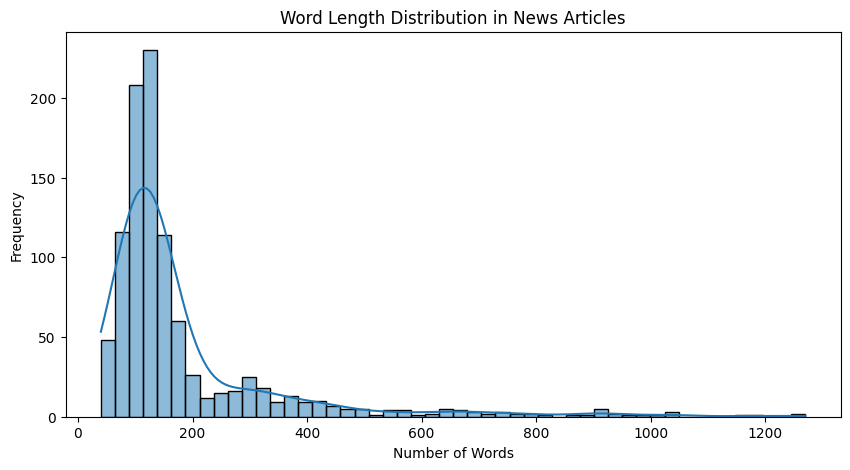

In [ ]:
# Visualization - Word Length Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['num_words'], bins=50, kde=True)
plt.title("Word Length Distribution in News Articles")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Show processed dataset
print(df[['headlines', 'category', 'cleaned_content', 'num_words', 'num_sentences', 'vocab_size']].head())

                                           headlines    category  \
0  Unlocking the science of E Ink displays: Why w...  technology   
1  Reddit is free education: 9 subreddits that ca...  technology   
2  Nintendo Switching things up? Leaks suggest la...  technology   
3  Epic’s Fortnite and new browser engines show c...  technology   
4  Hubble finds water vapour on small exoplanet i...  technology   

                                     cleaned_content  num_words  \
0  with their crisp paperlike screens ereaders li...        867   
1  education is the key to success it not only le...        769   
2  rumours are heating up that nintendo may unvei...        307   
3  apple is continuing to open up ios to comply w...        384   
4  astronomers used the hubble space telescope to...        319   

   num_sentences  vocab_size  
0              1         304  
1              1         291  
2              1         154  
3              1         170  
4              1         129  


In [ ]:
import plotly.graph_objects as go
from collections import Counter

# Get most common words in full text and summary
full_text_words = Counter(" ".join(df['content']).split())
summary_words = Counter(" ".join(df['description']).split())

# Select top 20 words from each
full_top_words = dict(full_text_words.most_common(20))
summary_top_words = dict(summary_words.most_common(20))

# Create Sankey diagram source and target
sources = []
targets = []
values = []

for word in summary_top_words:
    if word in full_top_words:
        sources.append(word)
        targets.append("Summary")
        values.append(summary_top_words[word])

sankey_data = go.Sankey(
    node=dict(label=list(full_top_words.keys()) + ["Description"], pad=30, thickness=20),
    link=dict(
        source=[list(full_top_words.keys()).index(src) for src in sources],
        target=[len(full_top_words) for _ in targets],  # Connect to "Summary"
        value=values
    )
)

fig = go.Figure(sankey_data)
fig.update_layout(title_text="Word Flow: Full Text → Description", font_size=10)
fig.show()


In [ ]:
import nltk
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
import pandas as pd

nltk.download("punkt")

# 🚀 Load Pretrained Sentence Transformer for Embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")

def text_rank_summary(text, num_sentences=3):
    """
    Summarize text using TextRank (extractive method).

    Args:
        text (str): Input full news article.
        num_sentences (int): Number of sentences in the summary.

    Returns:
        str: Extracted summary.
    """
    sentences = sent_tokenize(text)  # Tokenize text into sentences
    if len(sentences) <= num_sentences:
        return " ".join(sentences)  # If text is short, return as is

    # Compute sentence embeddings
    sentence_embeddings = model.encode(sentences)
    similarity_matrix = cosine_similarity(sentence_embeddings)

    # Build TextRank graph
    graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(graph)

    # Rank sentences by importance
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    summary = " ".join([s for _, s in ranked_sentences[:num_sentences]])

    return summary


df["cleaned_content"].fillna("", inplace=True)  # Handle missing values

# 🚀 Apply TextRank Summarization
df["generated_summary"] = df["cleaned_content"].apply(lambda x: text_rank_summary(x, num_sentences=3))

# ✅ Save Output
df.to_csv("summarized_news_textrank.csv", index=False)
print("✅ TextRank summarization complete! File saved as 'summarized_news_textrank.csv'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ TextRank summarization complete! File saved as 'summarized_news_textrank.csv'.


<ipython-input-13-9a863e37285c>:43: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
import pandas as pd
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from tqdm import tqdm  # Progress bar

# Load DistilBART Model
model_name = "sshleifer/distilbart-cnn-12-6"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Move to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def summarize_text(text):
    """Summarize text using DistilBART (fast summarization model)."""
    if not isinstance(text, str) or len(text.strip()) == 0:
        return ""

    inputs = tokenizer("summarize: " + text, return_tensors="pt", truncation=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    summary_ids = model.generate(inputs["input_ids"], max_length=120, min_length=30, length_penalty=2.0, num_beams=4)

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Load your dataset
df = pd.read_csv("combineddatasummary1000P.csv")  # Modify filename

# Apply summarization with a progress bar
tqdm.pandas()
df['generated_summary'] = df['content'].progress_apply(summarize_text)

# Save results
df.to_csv("news_summaries_fast.csv", index=False)
print("✅ Summarization done! Saved to 'news_summaries_fast.csv'")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]


100%|██████████| 999/999 [1:59:29<00:00,  7.18s/it]

✅ Summarization done! Saved to 'news_summaries_fast.csv'


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=745e22d69de83236d87cd25c4e8ba121990b2eaa8257f4c1ed1a184df97f4ec6
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
import pandas as pd
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np

# Load dataset with summaries
df = pd.read_csv("news_summaries_fast.csv")  # Ensure it has 'generated_summary' & 'reference_summary' columns

# If 'reference_summary' column is missing, add it (replace with your actual reference summaries)
if 'reference_summary' not in df.columns:

    df['reference_summary'] = 'your_reference_summaries'

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def calculate_rouge(reference, generated):
    """Compute ROUGE scores for one pair of reference & generated summary."""
    scores = scorer.score(reference, generated)
    return scores

In [ ]:
import pandas as pd
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np

# Load dataset with summaries
df = pd.read_csv("news_summaries_fast.csv")
if 'reference_summary' not in df.columns:

    df['reference_summary'] = df['description']

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def calculate_rouge(reference, generated):
    """Compute ROUGE scores for one pair of reference & generated summary."""
    scores = scorer.score(reference, generated)
    return {
        "rouge1": scores['rouge1'].fmeasure,
        "rouge2": scores['rouge2'].fmeasure,
        "rougeL": scores['rougeL'].fmeasure
    }

def calculate_bleu(reference, generated):
    """Compute BLEU score for one pair of reference & generated summary."""
    reference_tokens = reference.split()
    generated_tokens = generated.split()
    smoothing = SmoothingFunction().method1  # Smoothing for short texts
    return sentence_bleu([reference_tokens], generated_tokens, smoothing_function=smoothing)

# Compute metrics
rouge_scores = df.apply(lambda row: calculate_rouge(row['reference_summary'], row['generated_summary']), axis=1)
bleu_scores = df.apply(lambda row: calculate_bleu(row['reference_summary'], row['generated_summary']), axis=1)

# Convert ROUGE scores to DataFrame
rouge_df = pd.DataFrame(rouge_scores.tolist())
df['BLEU'] = bleu_scores
df = pd.concat([df, rouge_df], axis=1)

# Compute average scores
avg_scores = {
    "Avg ROUGE-1": np.mean(df['rouge1']),
    "Avg ROUGE-2": np.mean(df['rouge2']),
    "Avg ROUGE-L": np.mean(df['rougeL']),
    "Avg BLEU": np.mean(df['BLEU'])
}

# Save results
df.to_csv("news_summaries_evaluated.csv", index=False)
print("✅ Evaluation completed! Scores saved to 'news_summaries_evaluated.csv'")
print("📊 Average Scores:", avg_scores)

✅ Evaluation completed! Scores saved to 'news_summaries_evaluated.csv'
📊 Average Scores: {'Avg ROUGE-1': 0.30906290106350204, 'Avg ROUGE-2': 0.1272571269759391, 'Avg ROUGE-L': 0.23507172896031203, 'Avg BLEU': 0.05649188929690263}
